# Problem Statement
### Identifying Trends and Patterns in Campus Placement Data Using Machine Learning

# Project Description
### Campus recruitment is a strategy for sourcing, engaging and hiring young talent for internship and entry-level positions. College recruiting is typically a tactic for medium- to large-sized companies with high-volume recruiting needs, but can range from small efforts (like working with university career centers to source potential candidates) to large-scale operations (like visiting a wide array of colleges and attending recruiting events throughout the spring and fall semester).Campus recruitment often involves working with university career services centers and attending career fairs to meet in-person with college students and recent graduates.Our solution revolves around the placement season of a Business School in India. Where it has various factors on candidates getting hired such as work experience,exam percentage etc., Finally it

# About Dataset
### This data set consists of Placement data of students in our campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students

# Defining the problem type in machine learning terminology
### ---> The given problem is a binary classification problem 
### ---> we need to predict the status of the placement which is placed or not based on given features like ssc_p,                   hsc_p,workex etc..

In [68]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, accuracy_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings ('ignore') 

In [69]:
# importing Dataset
df = pd.read_csv("Placement_Data_Full_Class.csv")

In [70]:
# printing the first 5 records
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [71]:
# checking the info of the dataset
df.info()
# insights - out of 15 features 8 are categorical and remaining are numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [72]:
# printing the statistical analysis of the data
df.describe(include = 'all') # including categorical features

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
count,215.000000,215,215.000000,215,215.000000,215,215,215.000000,215,215,215.000000,215,215.000000,215,148.000000
unique,NaN,2,NaN,2,NaN,2,3,NaN,3,2,NaN,2,NaN,2,NaN
top,NaN,M,NaN,Central,NaN,Others,Commerce,NaN,Comm&Mgmt,No,NaN,Mkt&Fin,NaN,Placed,NaN
freq,NaN,139,NaN,116,NaN,131,113,NaN,145,141,NaN,120,NaN,148,NaN
mean,108.000000,NaN,67.303395,NaN,66.333163,NaN,NaN,66.370186,NaN,NaN,72.100558,NaN,62.278186,NaN,288655.405405
std,62.209324,NaN,10.827205,NaN,10.897509,NaN,NaN,7.358743,NaN,NaN,13.275956,NaN,5.833385,NaN,93457.452420
min,1.000000,NaN,40.890000,NaN,37.000000,NaN,NaN,50.000000,NaN,NaN,50.000000,NaN,51.210000,NaN,200000.000000
25%,54.500000,NaN,60.600000,NaN,60.900000,NaN,NaN,61.000000,NaN,NaN,60.000000,NaN,57.945000,NaN,240000.000000
50%,108.000000,NaN,67.000000,NaN,65.000000,NaN,NaN,66.000000,NaN,NaN,71.000000,NaN,62.000000,NaN,265000.000000
75%,161.500000,NaN,75.700000,NaN,73.000000,NaN,NaN,72.000000,NaN,NaN,83.500000,NaN,66.255000,NaN,300000.000000


In [73]:
# finding the shape of the dataset
df.shape

(215, 15)

In [74]:
# Data Cleaning

# Checking for the null values in the dataset
df.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [75]:
# checking the null values in salary column
df[df.salary.isnull()]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,4,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
5,6,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
9,10,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN
12,13,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199,F,67.0,Central,70.0,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,Not Placed,NaN
201,202,M,54.2,Central,63.0,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,Not Placed,NaN
206,207,M,41.0,Central,42.0,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,NaN
208,209,F,43.0,Central,60.0,Others,Science,65.00,Comm&Mgmt,No,92.66,Mkt&HR,62.92,Not Placed,NaN


In [76]:
df[(df.salary.isnull()) & (df.status == 'Not Placed')] # checking status of the null value salary records

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,4,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
5,6,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
9,10,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN
12,13,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199,F,67.0,Central,70.0,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,Not Placed,NaN
201,202,M,54.2,Central,63.0,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,Not Placed,NaN
206,207,M,41.0,Central,42.0,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,NaN
208,209,F,43.0,Central,60.0,Others,Science,65.00,Comm&Mgmt,No,92.66,Mkt&HR,62.92,Not Placed,NaN


In [77]:
# insights - the null value in salary is because the student in not placed so we can't remove the null value rows instead we make salary as 0

In [78]:
df = df.fillna(0)

In [79]:
# Confirming whether the null values removed or not
df.isna().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [80]:
# null values removed successfully
# checking for the duplicate records
df.duplicated().sum()

0

In [81]:
# no duplicate records are present in data
# next step is to remove unneccesary features
# sl_no, ssc_b, hsc_b are not required because placement status is not dependent the type of board
df.drop(['sl_no', 'ssc_b', 'hsc_b'], axis = 1, inplace = True)

In [82]:
# checking whether the columns are dropped successfully or not
df.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


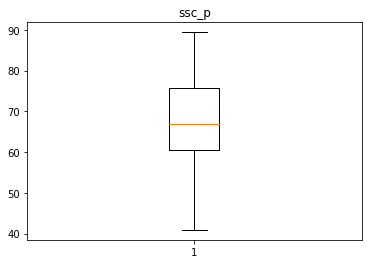

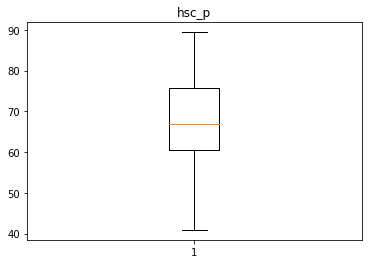

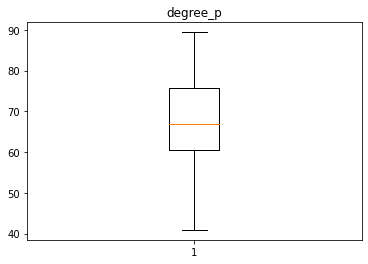

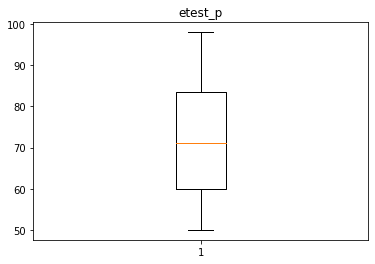

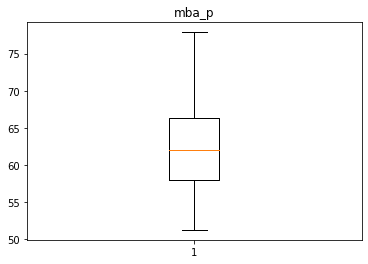

In [83]:
# Using boxplot to check for the outliers in the numerical data
plt.boxplot(df.ssc_p)
plt.title('ssc_p')
plt.show()

plt.boxplot(df.ssc_p)
plt.title('hsc_p')
plt.show()

plt.boxplot(df.ssc_p)
plt.title('degree_p')
plt.show()

plt.boxplot(df.etest_p)
plt.title('etest_p')
plt.show()

plt.boxplot(df.mba_p)
plt.title('mba_p')
plt.show()

In [84]:
# Insights - There are no outliers in the given data

In [85]:
# Data Visualization

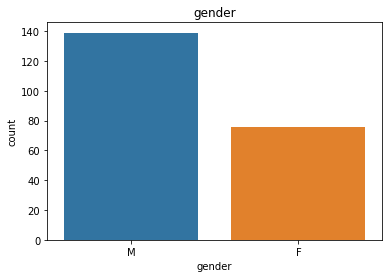

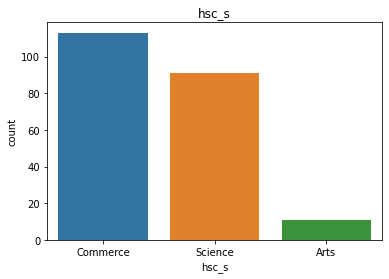

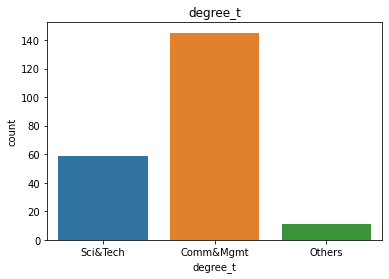

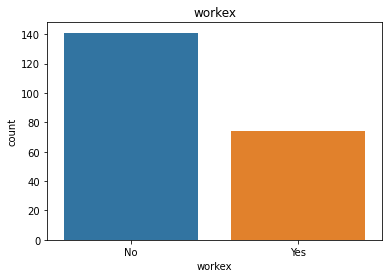

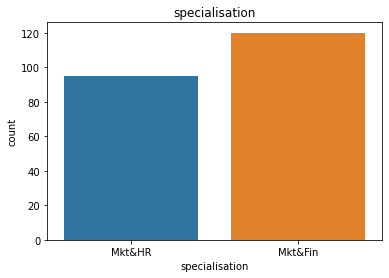

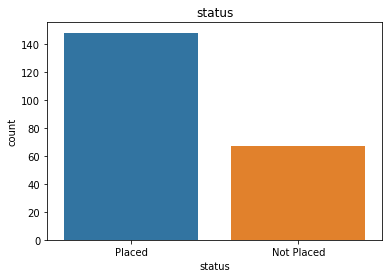

In [86]:
#Performing Univariant Analysis on the data

sns.countplot(df.gender)
plt.title('gender')
plt.show()

sns.countplot(df.hsc_s)
plt.title('hsc_s')
plt.show()

sns.countplot(df.degree_t)
plt.title('degree_t')
plt.show()

sns.countplot(df.workex)
plt.title('workex')
plt.show()

sns.countplot(df.specialisation)
plt.title('specialisation')
plt.show()

sns.countplot(df.status)
plt.title('status')
plt.show()

In [87]:
# Insights 
# 1) There are more number of male students then females
# 2) Arts students in hsc are very less compared to science, commerce
# 3) Comm&Mgmt students are more than sci&tech in degree
# 4) Most of the students have no work experience 
# 5) Many of the students are placed

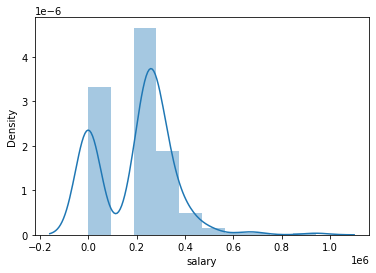

In [88]:
# salary distribution
sns.distplot(df.salary)
plt.show()

In [89]:
# Insights - Most of the students are placed with salary between 2 - 4 lpa

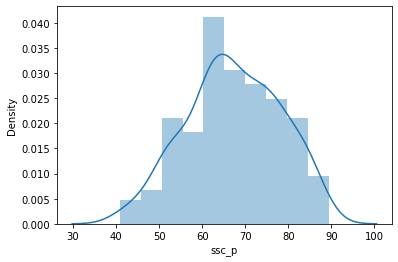

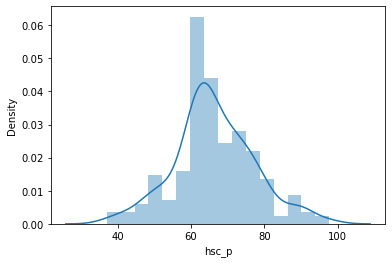

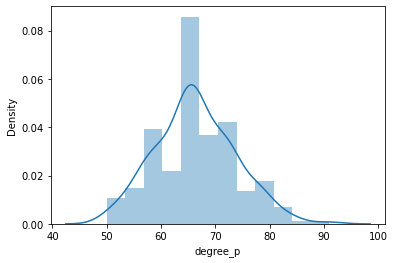

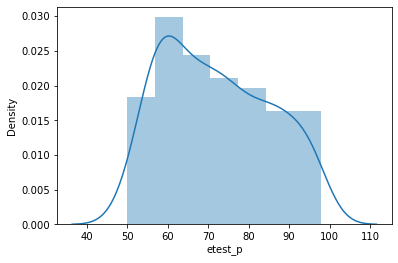

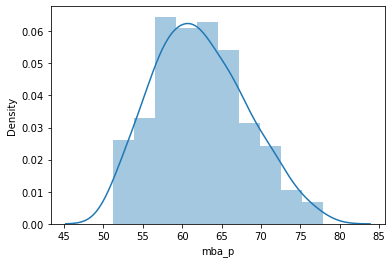

In [90]:
# Distribution of all the percentages
sns.distplot(df.ssc_p)
plt.show()

sns.distplot(df.hsc_p)
plt.show()

sns.distplot(df.degree_p)
plt.show()

sns.distplot(df.etest_p)
plt.show()

sns.distplot(df.mba_p)
plt.show()

In [91]:
# All the percentages are almost normally distrbuted

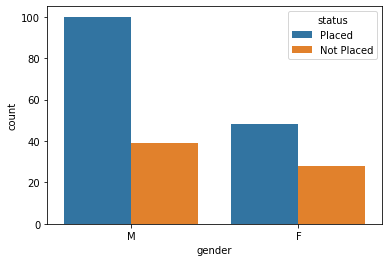

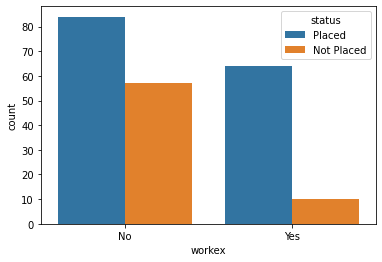

In [92]:
# Bivariant Analysis on the data

# gender vs status
sns.countplot(x = 'gender',hue = "status",data = df)
plt.show()

# workex vs status
sns.countplot(x = 'workex',hue = "status",data = df)
plt.show()

In [93]:
# Insights - Most of the students who has work experience are placed 

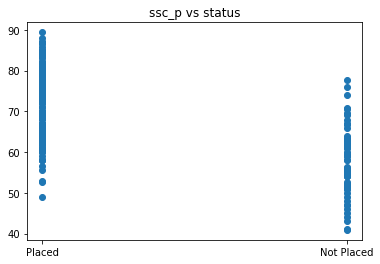

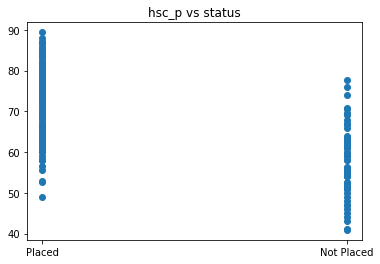

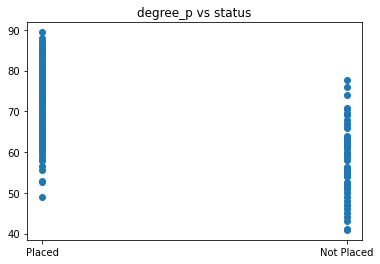

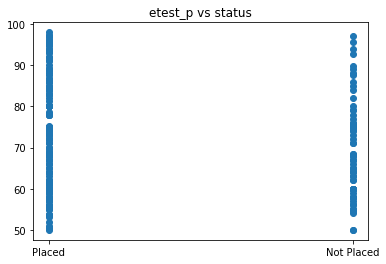

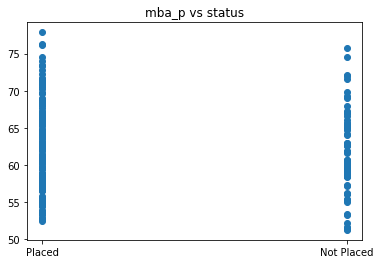

In [94]:
# Influence of the academics on placement status

# ssc_p vs status
plt.scatter(df.status, df.ssc_p)
plt.title('ssc_p vs status')
plt.show()

# hsc_p vs status
plt.scatter(df.status, df.ssc_p)
plt.title('hsc_p vs status')
plt.show()

# degree_p vs status
plt.scatter(df.status, df.ssc_p)
plt.title('degree_p vs status')
plt.show()

# etest_p vs status
plt.scatter(df.status, df.etest_p)
plt.title('etest_p vs status')
plt.show()

# mba_p vs status
plt.scatter(df.status, df.mba_p)
plt.title('mba_p vs status')
plt.show()

In [95]:
# Insights - There is a influence of academic percentage on the placement status

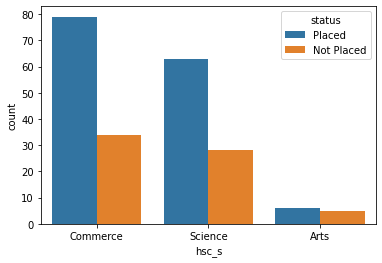

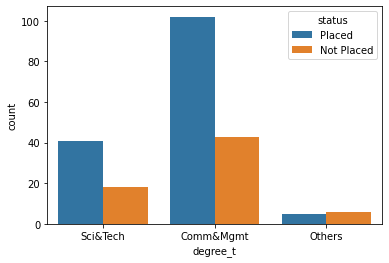

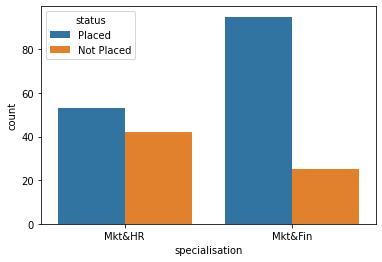

In [96]:
# Influence of specialization on placement status

# hsc specialisation vs status
sns.countplot(x = 'hsc_s',hue = "status",data = df)
plt.show()

# degree specialisation vs status
sns.countplot(x = 'degree_t',hue = "status",data = df)
plt.show()

# specialisation vs status
sns.countplot(x = 'specialisation',hue = "status",data = df)
plt.show()

In [97]:
# Insights - The specialization also have some influence on placement status

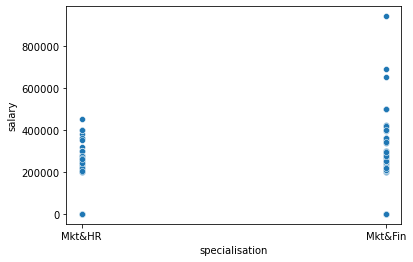

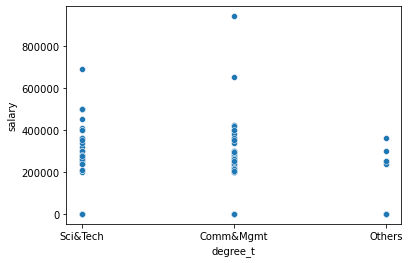

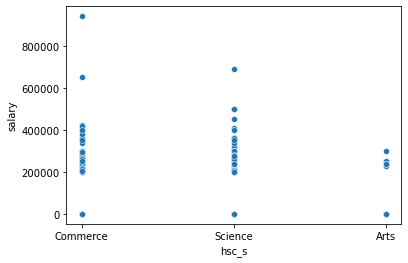

In [98]:
# Influence of specialization on salary structure

# specialisation vs salary
sns.scatterplot(x = 'specialisation',y = 'salary',data = df)
plt.show()

# degree specialisation vs salary
sns.scatterplot(x = 'degree_t',y = "salary",data = df)
plt.show()

# hsc specialisation vs salary
sns.scatterplot(x = 'hsc_s',y = "salary",data = df)
plt.show()

In [99]:
# Insights
# 1) Market & Finance student got hight salary than remaining
# 2) Arts students got less salary than commerce and science students

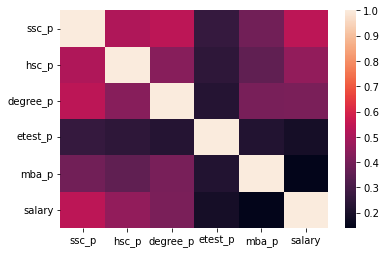

In [100]:
# Multivariant analysis

# Identifying correlation among all the features using heatmap
sns.heatmap(df.corr())
plt.show()

In [101]:
#Insights - The percentages of the student in his/her academics has almost no influence on the salary structure

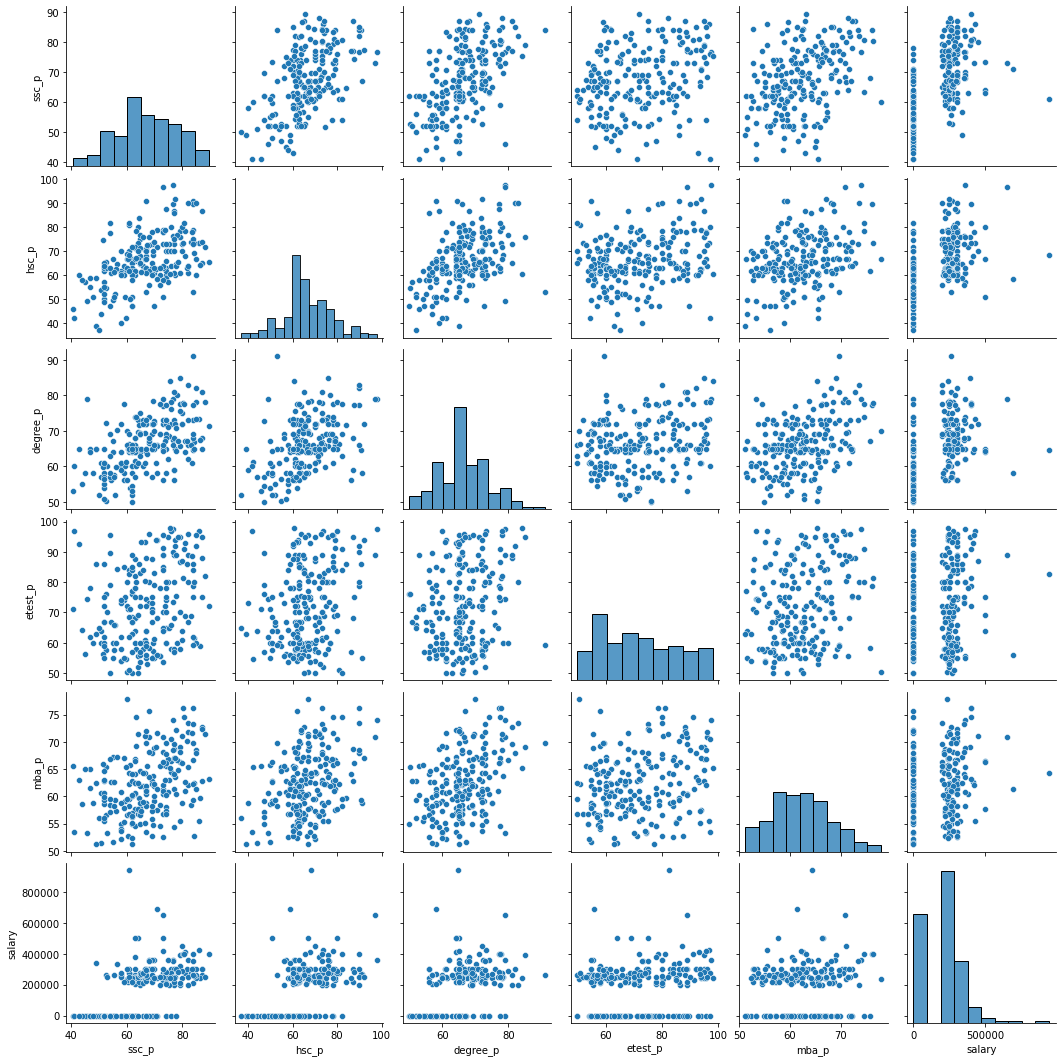

In [102]:
# checking distributions of all the features using pairplot
sns.pairplot(df)
plt.show()

In [103]:
# Data Preprocessing - converting categorical columns into numerical columns using encoding techniques

In [104]:
object_cols=['gender','workex','specialisation','status']

# Apply label encoder to each categorical column having only 2 types of classes
label_encoder = preprocessing.LabelEncoder()
for col in object_cols:
    df[col] = label_encoder.fit_transform(df[col])
df.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,91.00,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,1,79.33,78.33,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,1,65.00,68.00,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,1,56.00,52.00,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,1,85.80,73.60,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


In [105]:
# Applying Onehot encoding to each categorical column having more than 2 types of classes
dummy_hsc_s=pd.get_dummies(df['hsc_s'], prefix='dummy')
dummy_degree_t=pd.get_dummies(df['degree_t'], prefix='dummy')
df = pd.concat([df,dummy_hsc_s,dummy_degree_t],axis=1)
df.drop(['hsc_s','degree_t','salary'],axis=1, inplace=True)


In [114]:
df.rename(columns = {'dummy_hsc_s':'hsc_s', 'dummy_degree_t' : 'degree_t', 'dummy_Arts' : 'Arts', 'dummy_Commerce':'Commerce', 'dummy_Science': 'Science', 'dummy_Comm&Mgmt': 'Comm_Mgmt', 'dummy_Others' : 'Others', 'dummy_Sci&Tech': 'Sci_Tech'}, inplace = True)

In [115]:
# Checking the data
df.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,Arts,Commerce,Science,Comm_Mgmt,Others,Sci_Tech
0,1,67.00,91.00,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
1,1,79.33,78.33,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1
2,1,65.00,68.00,64.00,0,75.0,0,57.80,1,1,0,0,1,0,0
3,1,56.00,52.00,52.00,0,66.0,1,59.43,0,0,0,1,0,0,1
4,1,85.80,73.60,73.30,0,96.8,0,55.50,1,0,1,0,1,0,0


In [107]:
# The dataset has only numerical values know and it is ready for applying model on it

In [116]:
# Splitting the data
X = df.drop(['status'],axis=1)
y = df.status
X

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,Arts,Commerce,Science,Comm_Mgmt,Others,Sci_Tech
0,1,67.00,91.00,58.00,0,55.0,1,58.80,0,1,0,0,0,1
1,1,79.33,78.33,77.48,1,86.5,0,66.28,0,0,1,0,0,1
2,1,65.00,68.00,64.00,0,75.0,0,57.80,1,0,0,1,0,0
3,1,56.00,52.00,52.00,0,66.0,1,59.43,0,0,1,0,0,1
4,1,85.80,73.60,73.30,0,96.8,0,55.50,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,82.00,77.60,0,91.0,0,74.49,0,1,0,1,0,0
211,1,58.00,60.00,72.00,0,74.0,0,53.62,0,0,1,0,0,1
212,1,67.00,67.00,73.00,1,59.0,0,69.72,0,1,0,1,0,0
213,0,74.00,66.00,58.00,0,70.0,1,60.23,0,1,0,1,0,0


In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (172, 14)
Input Test: (43, 14)
Output Training: (172,)
Output Test: (43,)


In [110]:
# Machine learning models used for classification are logistic regression, SVM, Naive Bayes, Decision Tree, Random Forest

In [111]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set:', (logreg.score(X_test, y_test)) * 100, '%')
rmse = np.sqrt(mean_squared_error(y_test, logreg_pred))
print("RMSE: %f" % (rmse))

Accuracy of logistic regression classifier on test set: 90.69767441860465 %
RMSE: 0.304997


Confusion Matrix:
 [[12  3]
 [ 1 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.90      0.96      0.93        28

    accuracy                           0.91        43
   macro avg       0.91      0.88      0.89        43
weighted avg       0.91      0.91      0.91        43



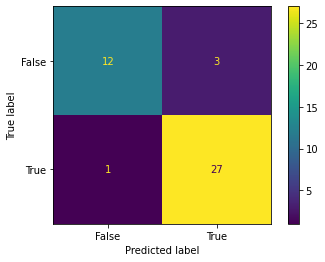

In [112]:
confusion_matrix = metrics.confusion_matrix(y_test, logreg_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, logreg_pred))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [113]:
# Insights
# 1) we got 92% and 90% precision in classifying our model
# 2) 12 + 27 are classified correctly and 1 + 3 are classified incorrectly

In [47]:
# SVM
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print('Accuracy of svm classifier on test set:', (svm.score(X_test, y_test)) * 100, '%')
rmse = np.sqrt(mean_squared_error(y_test, svm_pred))
print("RMSE: %f" % (rmse))

Accuracy of svm classifier on test set: 81.3953488372093 %
RMSE: 0.431331


Confusion Matrix:
 [[ 7  8]
 [ 0 28]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.47      0.64        15
           1       0.78      1.00      0.88        28

    accuracy                           0.81        43
   macro avg       0.89      0.73      0.76        43
weighted avg       0.86      0.81      0.79        43



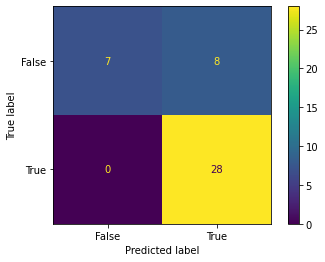

In [48]:
confusion_matrix = metrics.confusion_matrix(y_test, svm_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, svm_pred))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [49]:
# Insights
# 1) we got 100% and 78% precision in classifying our model
# 2) 7 + 28 are classified correctly and 0 + 8 are classified incorrectly

In [50]:
# Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
print('Accuracy of Naive Bayes classifier on test set:', (gnb.score(X_test, y_test)) * 100, '%')
rmse = np.sqrt(mean_squared_error(y_test, gnb_pred))
print("RMSE: %f" % (rmse))

Accuracy of Naive Bayes classifier on test set: 76.74418604651163 %
RMSE: 0.482243


Confusion Matrix:
 [[ 9  6]
 [ 4 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.60      0.64        15
           1       0.80      0.86      0.83        28

    accuracy                           0.77        43
   macro avg       0.75      0.73      0.74        43
weighted avg       0.76      0.77      0.76        43



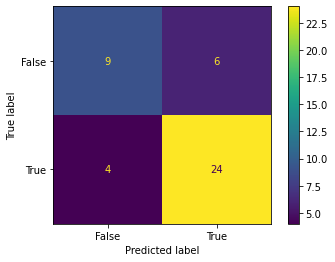

In [51]:
confusion_matrix = metrics.confusion_matrix(y_test, gnb_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, gnb_pred))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [52]:
# Insights
# 1) we got 69% and 80% precision in classifying our model
# 2) 9 + 24 are classified correctly and 4 + 6 are classified incorrectly

In [53]:
# Decision Tree
dt = DecisionTreeClassifier()
dt = dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)
print('Accuracy of Decision Tree classifier on test set:',(metrics.accuracy_score(y_test, dt_pred)) * 100, '%')
rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
print("RMSE: %f" % (rmse))

Accuracy of Decision Tree classifier on test set: 79.06976744186046 %
RMSE: 0.457496


Confusion Matrix:
 [[ 9  6]
 [ 3 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.60      0.67        15
           1       0.81      0.89      0.85        28

    accuracy                           0.79        43
   macro avg       0.78      0.75      0.76        43
weighted avg       0.79      0.79      0.78        43



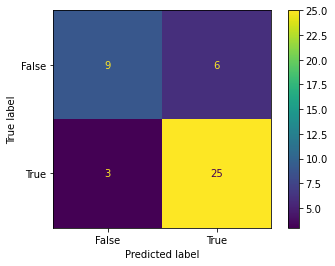

In [54]:
confusion_matrix = metrics.confusion_matrix(y_test, dt_pred)
print("Confusion Matrix:\n",confusion_matrix)

print("Classification Report:\n",classification_report(y_test, dt_pred))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [55]:
# Insights
# 1) we got 75% and 81% precision in classifying our model
# 2) 9 + 25 are classified correctly and 3 + 6 are classified incorrectly

In [56]:
# Random Forest
rt = RandomForestClassifier(n_estimators = 100, random_state = 0)
rt.fit(X_train,y_train)
rt_pred = rt.predict(X_test)
print('Accuracy of Rondom Forest Classifier on test set:',(metrics.accuracy_score(y_test, rt_pred)) * 100, '%')
rmse = np.sqrt(mean_squared_error(y_test, rt_pred))
print("RMSE: %f" % (rmse))

Accuracy of Rondom Forest Classifier on test set: 81.3953488372093 %
RMSE: 0.431331


Confusion Matrix:
 [[ 8  7]
 [ 1 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.53      0.67        15
           1       0.79      0.96      0.87        28

    accuracy                           0.81        43
   macro avg       0.84      0.75      0.77        43
weighted avg       0.83      0.81      0.80        43



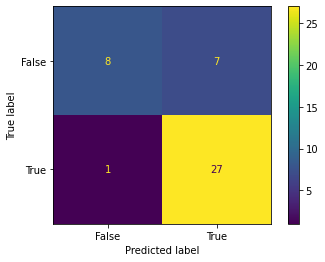

In [57]:
confusion_matrix = metrics.confusion_matrix(y_test, rt_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, rt_pred))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [58]:
# Insights
# 1) we got 89% and 79% precision in classifying our model
# 2) 8 + 27 are classified correctly and 1 + 7 are classified incorrectly

## Parameter Tuning using grid search for KNN

In [59]:
# Hyper Parameter tuning on KNN with GridSearch cv
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors = k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score = False, verbose = 1)
  
# fitting the model for grid search
grid_search = grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [60]:
print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is :",accuracy, '%')

{'n_neighbors': 8}
Accuracy for our training dataset with tuning is : 88.92156862745098 %


In [61]:
knn = KNeighborsClassifier(n_neighbors = 8)

knn.fit(X_train,y_train)

knn_pred = knn.predict(X_test) 

test_accuracy = accuracy_score(y_test,knn_pred) * 100

print("Accuracy for our testing dataset with tuning is:", test_accuracy, '%')

Accuracy for our testing dataset with tuning is: 81.3953488372093 %


Confusion Matrix:
 [[ 8  7]
 [ 1 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.53      0.67        15
           1       0.79      0.96      0.87        28

    accuracy                           0.81        43
   macro avg       0.84      0.75      0.77        43
weighted avg       0.83      0.81      0.80        43



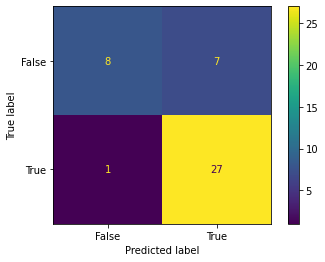

In [62]:
confusion_matrix = metrics.confusion_matrix(y_test, knn_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, knn_pred))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [63]:
# Insights
# 1) we got 89% and 79% precision in classifying our model
# 2) 8 + 27 are classified correctly and 1 + 7 are classified incorrectly

# Conclusion

### Accuracy of Random Forest = 81%
### Accuracy of Decision Tree = 81%
### Accuracy of Logistic Regression = 90%
### Accuracy of SVM = 81% 
### Accuracy of KNN = 81%
### Accuracy of Naive Bayes = 76%
## Among all the classifiers the Logistic Regression classifier gave a high accuracy for the prediction

# Report Summary

<img src='http://clipart-library.com/image_gallery/n697560.png' width="400" height="400">

## From the analysis report on Campus Recruitment dataset here are my following conclusions

### --> Educational percentages are highly influential for a candidate to get placed
### --> Past work experience doesn't influence much on your masters final placements
### --> There are no gender discrimination while hiring, but higher packages were given to male
### --> Academic percentages have no relation towards salary package.


In [64]:
import pickle

In [65]:
filename = 'finalized_model.sav'
pickle.dump(logreg, open(filename, 'wb'))